# 3 Виконання

## 3.1 Завантажити метеорологічні дані в 1895-2022 роках з CSV-файлу в DataFrame. Після цього дані відформатувати для використання 

### Зчитаємо даніз CSV-файлу, уикористовуючи метод read_csv.

In [12]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
nyc

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


*Завантаження датасету*

In [13]:
### Відформатуємо датафрейм, а саме: переназвемо стовпці та застосуємо цілочисельне ділення, поділивши значенння років на 100.

In [14]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
...,...,...,...
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4


*Форматований датафрейм*

In [15]:
### Налаштужмо точність виведення чисел.

In [16]:
pd.options.display.precision = 2
pd.options.display.precision

2

*Налаштування точності виведення*

### Знайдемо основні статистичні показники.

In [17]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

*Основні статистичні показники*

## Спрогнозувати дані на 2019, 2020, 2021 та 2022 рік

### Імпортуємо модуль stats з пакету scipy та за допомогою функції linregress знайдемо лінійну регрусію, передавши в аргумети дати та температури. 

In [18]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

*Розрахунок лінійної регресії*

### Розрахувавши регресію, дізнаємося про коефіцієнт нахилу.

In [19]:
linear_regression.slope

0.014771361132966163

*Коефіцієнт нахилу*

### Дізнаємося про точку перетину прямої лінії

In [20]:
linear_regression.intercept

8.694993233674289

*Точка перетину прямої лінії*

### Спрогнозуємо дані для наступних років. Тобто підставимо роки у формулу лінійної регресії.

In [21]:
years = np.array([2019, 2020, 2021, 2022])
values = linear_regression.slope * years + linear_regression.intercept
df_predict = pd.DataFrame({'Years': years, 'Temperature': values})
df_predict

,Years,Temperature
0,2019,38.52
1,2020,38.53
2,2021,38.55
3,2022,38.56


*Прогнозовані температури за роками*

## Оцінити за формулою, якими могли б бути показники до 1895 року

### Обчислимо показники до 1895 року

In [22]:
years = np.array(range(1885, 1896))
values = linear_regression.slope * years + linear_regression.intercept
df_predict = pd.DataFrame({'Years': years, 'Temperature': values})
df_predict

,Years,Temperature
0,1885,36.54
1,1886,36.55
2,1887,36.57
3,1888,36.58
4,1889,36.60
...,...,...
6,1891,36.63
7,1892,36.64
8,1893,36.66
9,1894,36.67


*Показники температур з 1885 по 1895 роки включно*

### Як можна побачити, температура поступово зростає, і з періоду 1885 по 2023 роки спостерігається збільшення на 2 градуси.

## Скористатися функцією regplot бібліотеки Seaborn для виведення всіх точок даних

### Імпортуємо Seaborn, встановлюємо стиль відображення, побудуємо графік роки-температури. Побачимо, що дані доволі розкидані.

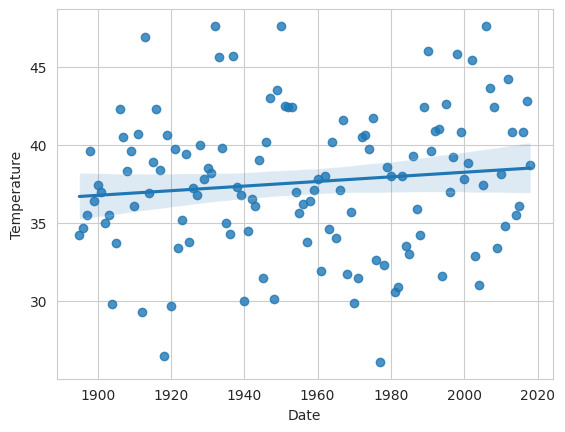

In [23]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

*Графік лінійної регресії роки-температури*

## Виконати масштабування осі у

### За допомогою методу set_ylim вкажемо межі від 10 до 70 градусів.

(10.0, 70.0)

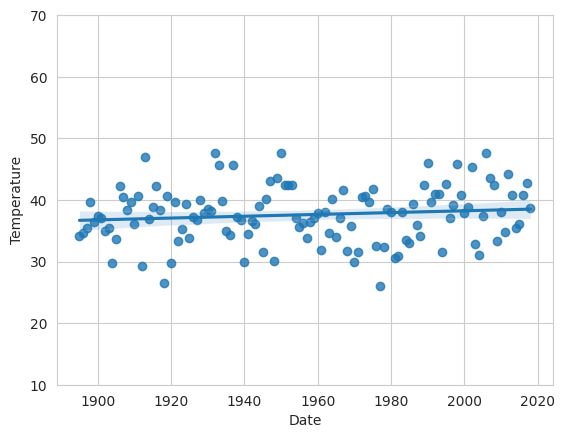

In [24]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

*Масштабований графік від 10 до 70 градусів*

## Порівняти отриманий прогноз для 2019, 2020, 2021 та за 2022 роки з даними на NOAA «Climate at a Glance»: https://www.ncdc.noaa.gov/cag/ і зробити висновок

### Подивимося на сайті дані за період 2019-2023 років. Побачимо, що фактичні дані сильно відрізняються від того, що спрогнозувала лінійна регресія. Можна зробити висновок, що треба давати їй іще якісь дані для кращого прогнозування, наприклад: кількість опадів, кількість CO2 тощо.

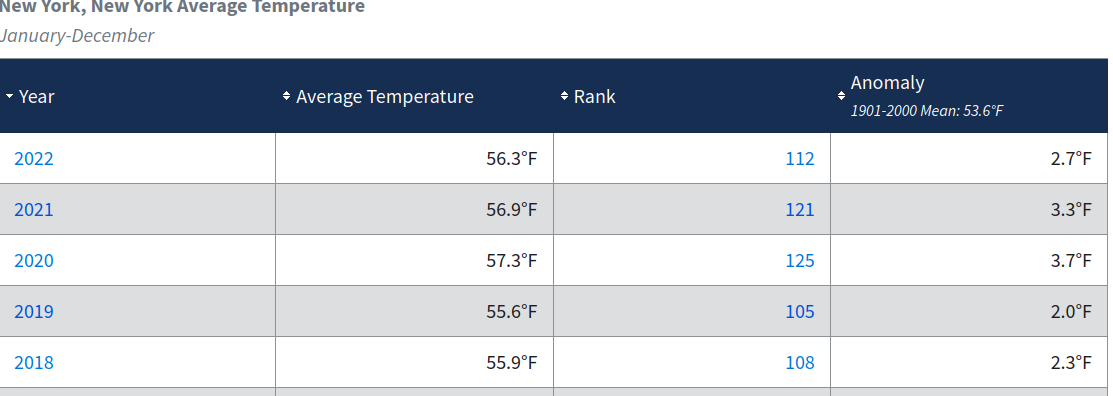

In [27]:
from PIL import Image
im = Image.open('data/Screenshot from 2023-03-15 20-01-39.png')
im

*Справжні зафіксовані дані середніх температур*